In [1]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad, Ftrl, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_data(path_data):
    data = []
    labels = []

    for label in os.listdir(path_data):
        path_label = os.path.join(path_data, label)
        for img in os.listdir(path_label):
            path_img = os.path.join(path_label, img)
            image = Image.open(path_img)
            image = image.resize((128, 128))
            image = image.convert('RGB')
            image = np.array(image)
            data.append(image)
            labels.append(1) if label == 'PNEUMONIA' else labels.append(0)

    return data, labels

# Paths
path = "/kaggle/input/chest-xray-pneumonia/chest_xray/"
path_train = path + 'train'
path_test = path + 'test'
path_val = path + 'val'

# Load data
x_train, y_train = load_data(path_train)
x_test, y_test = load_data(path_test)
x_val, y_val = load_data(path_val)

# Print data sizes
print(len(x_train))

5216


In [3]:
X=np.array(x_train)
Y=np.array(y_train)
print(X.shape)
print(Y.shape)

x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(5216, 128, 128, 3)
(5216,)
(624, 128, 128, 3)
(624,)


In [4]:
X=X/255

In [5]:
from sklearn.model_selection import train_test_split
X,x_test,Y,y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [6]:
# Model
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Epoch 1/15
59/59 [==============================] - 5s 29ms/step - loss: 0.5982 - accuracy: 0.7310 - val_loss: 0.5501 - val_accuracy: 0.7679
Epoch 2/15
59/59 [==============================] - 1s 16ms/step - loss: 0.5713 - accuracy: 0.7397 - val_loss: 0.5503 - val_accuracy: 0.7679
Epoch 3/15
59/59 [==============================] - 1s 15ms/step - loss: 0.5382 - accuracy: 0.7397 - val_loss: 0.4393 - val_accuracy: 0.7679
Epoch 4/15
59/59 [==============================] - 1s 15ms/step - loss: 0.4732 - accuracy: 0.7445 - val_loss: 0.3061 - val_accuracy: 0.8278
Epoch 5/15
59/59 [==============================] - 1s 15ms/step - loss: 0.3728 - accuracy: 0.8186 - val_loss: 0.2441 - val_accuracy: 0.9067
Epoch 6/15
59/59 [==============================] - 1s 15ms/step - loss: 0.3385 - accuracy: 0.8612 - val_loss: 0.2214 - val_accuracy: 0.9258
Epoch 7/15
59/59 [==============================] - 1s 15ms/step - loss: 0.2378 - accuracy: 0.9052 - val_loss: 0.2547 - val_accuracy: 0.8804
Epoch 8/15
59

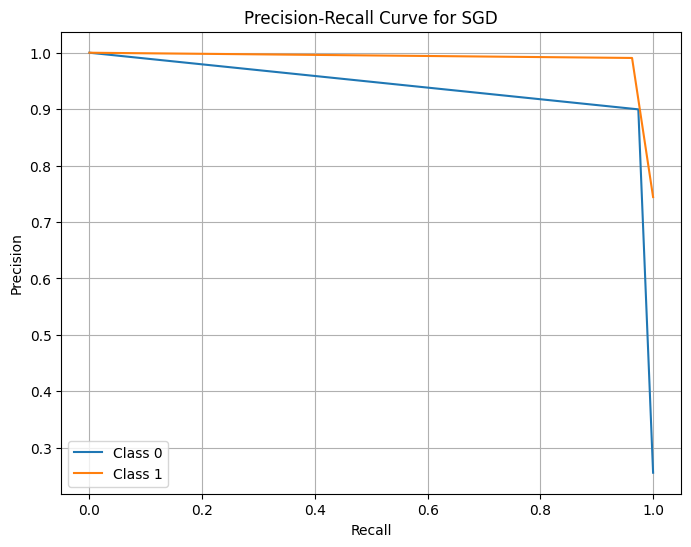

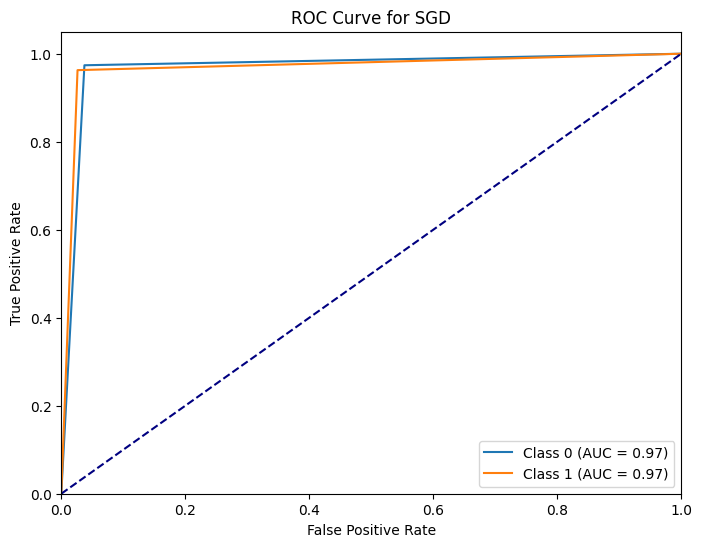

Epoch 1/15
59/59 [==============================] - 4s 23ms/step - loss: 0.0844 - accuracy: 0.9750 - val_loss: 0.1053 - val_accuracy: 0.9641
Epoch 2/15
59/59 [==============================] - 1s 15ms/step - loss: 0.0790 - accuracy: 0.9763 - val_loss: 0.0970 - val_accuracy: 0.9593
Epoch 3/15
59/59 [==============================] - 1s 15ms/step - loss: 0.0709 - accuracy: 0.9774 - val_loss: 0.1203 - val_accuracy: 0.9641
Epoch 4/15
59/59 [==============================] - 1s 15ms/step - loss: 0.0707 - accuracy: 0.9782 - val_loss: 0.1029 - val_accuracy: 0.9617
Epoch 5/15
59/59 [==============================] - 1s 15ms/step - loss: 0.0730 - accuracy: 0.9774 - val_loss: 0.1057 - val_accuracy: 0.9665
Epoch 6/15
59/59 [==============================] - 1s 16ms/step - loss: 0.0572 - accuracy: 0.9811 - val_loss: 0.0976 - val_accuracy: 0.9665
Epoch 7/15
59/59 [==============================] - 1s 15ms/step - loss: 0.0642 - accuracy: 0.9784 - val_loss: 0.1032 - val_accuracy: 0.9641
Epoch 8/15
59

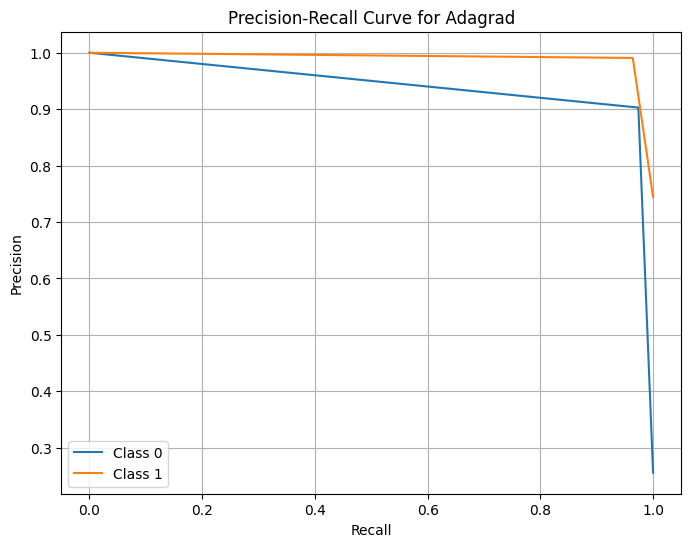

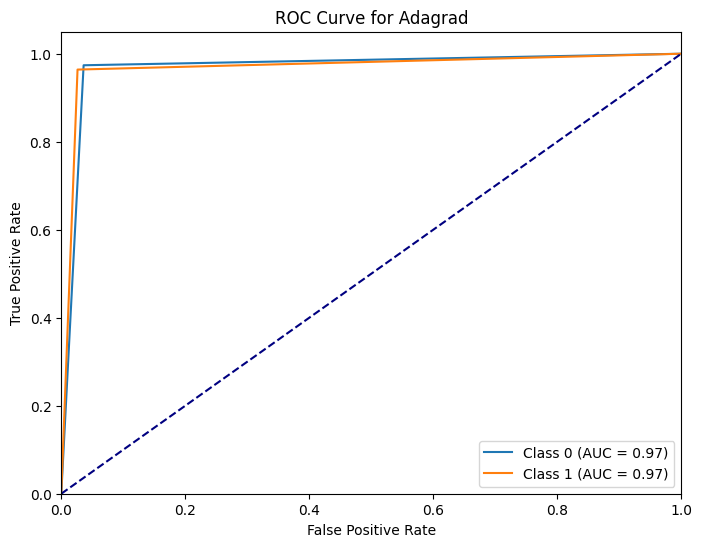

Epoch 1/15
59/59 [==============================] - 5s 23ms/step - loss: 0.0433 - accuracy: 0.9848 - val_loss: 0.1234 - val_accuracy: 0.9689
Epoch 2/15
59/59 [==============================] - 1s 16ms/step - loss: 0.0466 - accuracy: 0.9867 - val_loss: 0.1062 - val_accuracy: 0.9665
Epoch 3/15
59/59 [==============================] - 1s 16ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.1236 - val_accuracy: 0.9665
Epoch 4/15
59/59 [==============================] - 1s 16ms/step - loss: 0.0322 - accuracy: 0.9891 - val_loss: 0.1273 - val_accuracy: 0.9665
Epoch 5/15
59/59 [==============================] - 1s 15ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.1118 - val_accuracy: 0.9665
Epoch 6/15
59/59 [==============================] - 1s 16ms/step - loss: 0.0362 - accuracy: 0.9867 - val_loss: 0.1500 - val_accuracy: 0.9617
Epoch 7/15
59/59 [==============================] - 1s 16ms/step - loss: 0.0456 - accuracy: 0.9867 - val_loss: 0.1477 - val_accuracy: 0.9641
Epoch 8/15
59

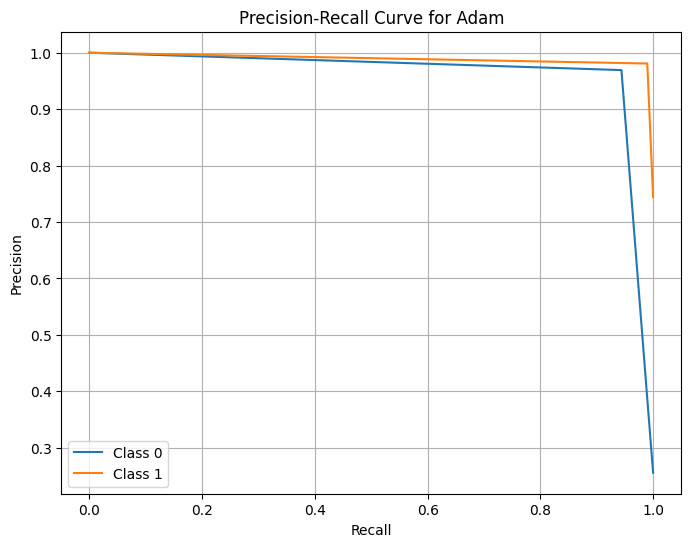

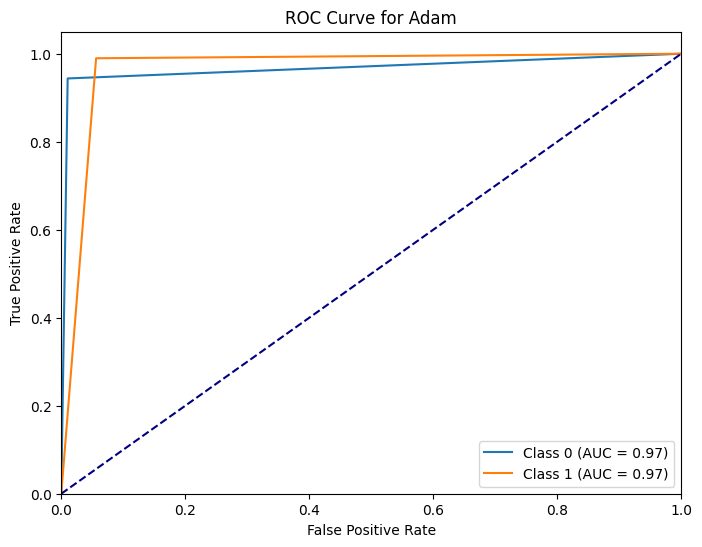

Epoch 1/15
59/59 [==============================] - 4s 23ms/step - loss: 0.4419 - accuracy: 0.9481 - val_loss: 0.2328 - val_accuracy: 0.9498
Epoch 2/15
59/59 [==============================] - 1s 15ms/step - loss: 0.1604 - accuracy: 0.9630 - val_loss: 0.5370 - val_accuracy: 0.9211
Epoch 3/15
59/59 [==============================] - 1s 15ms/step - loss: 0.1585 - accuracy: 0.9638 - val_loss: 0.1083 - val_accuracy: 0.9689
Epoch 4/15
59/59 [==============================] - 1s 15ms/step - loss: 0.1449 - accuracy: 0.9667 - val_loss: 0.3491 - val_accuracy: 0.9474
Epoch 5/15
59/59 [==============================] - 1s 15ms/step - loss: 0.1664 - accuracy: 0.9728 - val_loss: 2.3720 - val_accuracy: 0.8493
Epoch 6/15
59/59 [==============================] - 1s 15ms/step - loss: 0.3820 - accuracy: 0.9622 - val_loss: 1.2189 - val_accuracy: 0.8995
Epoch 7/15
59/59 [==============================] - 1s 15ms/step - loss: 0.1600 - accuracy: 0.9712 - val_loss: 0.8023 - val_accuracy: 0.8995
Epoch 8/15
59

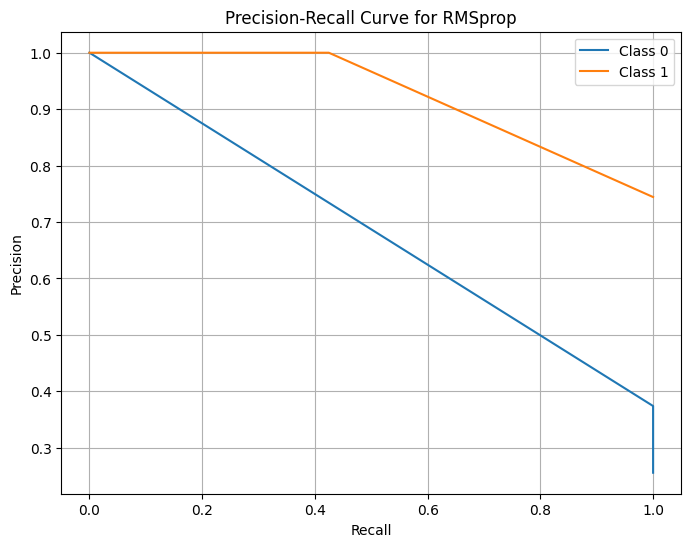

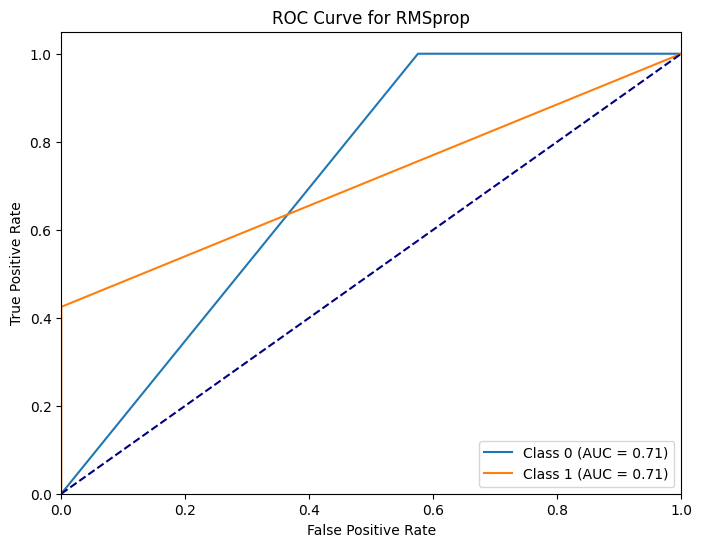

In [7]:
learning_rates = {'SGD': 0.1, 'Adagrad': 0.01, 'Adam': 0.0001, 'RMSprop': 0.001}
model_acc=[]
model_pre=[]
model_rec=[]
model_f1=[]
model_cm=[]

history = {}
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for opt in learning_rates:
    optimizer = None
    
    if opt == 'Adam':
        optimizer = Adam(learning_rate=learning_rates[opt])
        i=1
        j=0
    elif opt == 'Ftrl':
        optimizer = Ftrl(learning_rate=learning_rates[opt])
    elif opt == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rates[opt])
        i=1
        j=1
    elif opt == 'Adagrad':
        optimizer = Adagrad(learning_rate=learning_rates[opt])
        i=0
        j=1
    elif opt == 'SGD':
        optimizer = SGD(learning_rate=learning_rates[opt])
        i=0
        j=0
        
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history[opt] = model.fit(X, Y, epochs=15, batch_size=64, validation_split=0.1)
    
    y_pred = model.predict(x_test)
    y_pred = np.round(y_pred)

    model_acc.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    model_pre.append(precision_score(y_test, y_pred, average='weighted'))
    model_rec.append(recall_score(y_test, y_pred, average='weighted'))
    model_f1.append(f1_score(y_test, y_pred, average='weighted'))
    model_cm.append(confusion_matrix(y_test, y_pred))
    
    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {opt}')
    plt.grid(True)
    classes=[0,1]
    # Calculate precision-recall curve for each class
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve(y_test == classes[i], y_pred == classes[i])
        plt.plot(recall, precision, label=f'Class {classes[i]}')

    plt.legend()
    plt.savefig(f'{opt}_precision_recall.png')

    plt.show()
    
    # Plot ROC Curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
   
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test == classes[i], y_pred == classes[i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {opt}')
    plt.legend(loc='lower right')

    plt.savefig(f'{opt}_ROC_curve.png')

    plt.show()

# plt.tight_layout()
# plt.savefig('Confusion Matrix.png', dpi=300)
# plt.show()

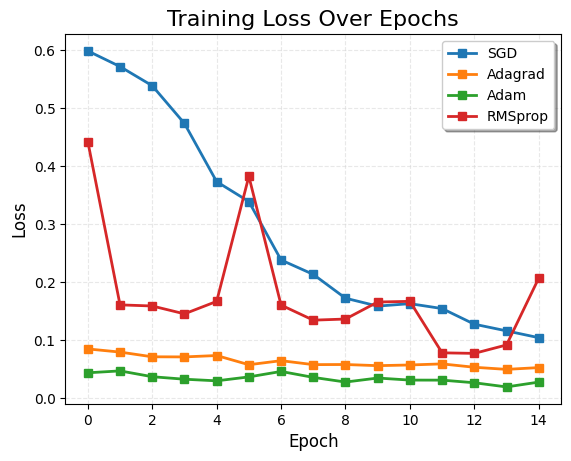

In [8]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting loop
for i, key in enumerate(history.keys()):
    plt.plot(history[key].history['loss'], label=key, color=colors[i % len(colors)], linestyle='-', linewidth=2 ,marker='s')

# Set plot labels and title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Over Epochs', fontsize=16)

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.5, color='lightgray')

# Customize legend with a better location and shadow
plt.legend(loc='upper right', fontsize=10, shadow=True)

# Adjust the size of ticks on both axes
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('Training Loss Over Epochs.png', dpi=300)

# Show the plot
plt.show()

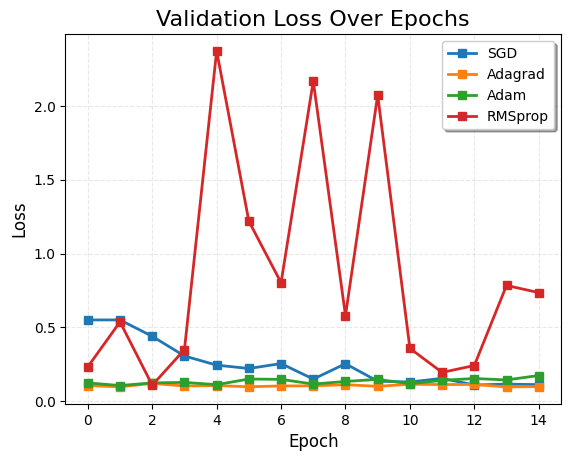

In [9]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting loop
for i, key in enumerate(history.keys()):
    plt.plot(history[key].history['val_loss'], label=key, color=colors[i % len(colors)], linestyle='-', linewidth=2 ,marker='s')

# Set plot labels and title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Validation Loss Over Epochs', fontsize=16)

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.5, color='lightgray')

# Customize legend with a better location and shadow
plt.legend(loc='upper right', fontsize=10, shadow=True)

# Adjust the size of ticks on both axes
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('Validation Loss Over Epochs.png', dpi=300)

# Show the plot
plt.show()

In [10]:
import plotly.express as px
import plotly.colors

# Assuming you have an optimizer list corresponding to each dataset
optimizers = ['SGD', 'Adagrad', 'Adam', 'RMSprop']

accuracy = []

# Extract R2 values from history
for i, key in enumerate(history.keys()):
    accuracy.append(history[key].history['accuracy'])

# Choose a colormap for distinct colors
colormap = plotly.colors.qualitative.Set2

# Create the initial line trace with labels
fig = px.line(x=range(1,len(accuracy[0])+1), y=accuracy[0], line_shape='linear')

# Update the initial trace to fill the area between the line and the axis
fig.update_traces(fill='tozeroy', line_color=colormap[0], name=optimizers[0])

# Add additional line traces for other datasets with unique colors and labels
for i in range(1, len(accuracy)):
    fig.add_trace(px.line(x=range(1,len(accuracy[0])+1), y=accuracy[i], line_shape='linear')
                  .update_traces(fill='tonexty', line_color=colormap[i], name=optimizers[i]).data[0])


legend_data = [{'label': optimizer, 'color': colormap[i]} for i, optimizer in enumerate(optimizers)]

# Update layout for a cleaner appearance and set figure size to (12,12)
fig.update_layout(
    title='Accuracy for Training Data',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    legend_title='Optimizers',
    font=dict(family='Arial', size=14, color='dark blue'),
    legend=dict(x=1.02, y=0.95, traceorder='normal'),
    plot_bgcolor='white',
    annotations=[
        dict(
            x=1.15,
            y=0.9 - i * 0.1,
            xref='paper',
            yref='paper',
            text=f"{optimizer['label']}",
            showarrow=False,
            font=dict(color=optimizer['color'])
        ) for i, optimizer in enumerate(legend_data)
    ]
)

# Set figure size to (12, 12)
fig.update_layout(width=700, height=700)
fig.update_yaxes(range=[0.84, 1])

# Show the plot
fig.show()


In [11]:
import plotly.express as px
import plotly.colors

# Assuming you have an optimizer list corresponding to each dataset
optimizers = ['SGD', 'Adagrad', 'Adam', 'RMSprop']

accuracy = []

# Extract R2 values from history
for i, key in enumerate(history.keys()):
    accuracy.append(history[key].history['val_accuracy'])

# Choose a colormap for distinct colors
colormap = plotly.colors.qualitative.Set2

# Create the initial line trace with labels
fig = px.line(x=range(1,len(accuracy[0])+1), y=accuracy[0], line_shape='linear')

# Update the initial trace to fill the area between the line and the axis
fig.update_traces(fill='tozeroy', line_color=colormap[0], name=optimizers[0])

# Add additional line traces for other datasets with unique colors and labels
for i in range(1, len(accuracy)):
    fig.add_trace(px.line(x=range(1,len(accuracy[0])+1), y=accuracy[i], line_shape='linear')
                  .update_traces(fill='tonexty', line_color=colormap[i], name=optimizers[i]).data[0])


legend_data = [{'label': optimizer, 'color': colormap[i]} for i, optimizer in enumerate(optimizers)]

# Update layout for a cleaner appearance and set figure size to (12,12)
fig.update_layout(
    title='Validation Accuracy for Training Data',
    xaxis_title='Epoch',
    yaxis_title='Validation Accuracy',
    legend_title='Optimizers',
    font=dict(family='Arial', size=14, color='dark blue'),
    legend=dict(x=1.02, y=0.95, traceorder='normal'),
    plot_bgcolor='white',
    annotations=[
        dict(
            x=1.15,
            y=0.9 - i * 0.1,
            xref='paper',
            yref='paper',
            text=f"{optimizer['label']}",
            showarrow=False,
            font=dict(color=optimizer['color'])
        ) for i, optimizer in enumerate(legend_data)
    ]
)

# Set figure size to (12, 12)
fig.update_layout(width=700, height=700)
fig.update_yaxes(range=[0.84, 1])

# Show the plot
fig.show()


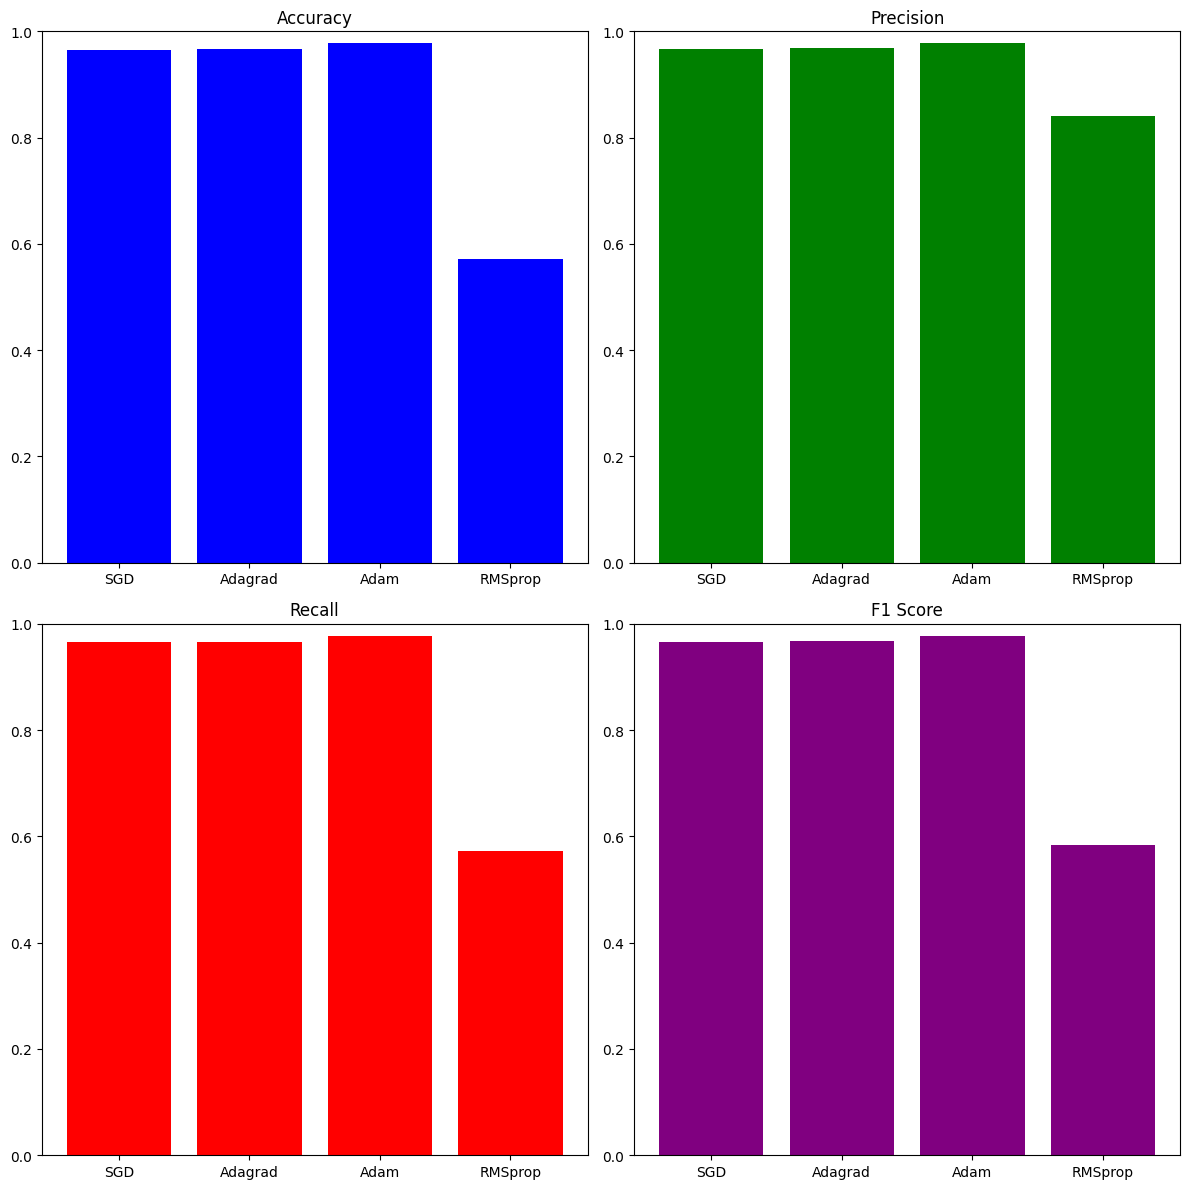

In [12]:
# results_df = pd.DataFrame(all_results)
# print(results_df)

# Extracting metric values from results_df
# parameters = results_df['Model']
# accuracy = results_df['Accuracy']
# precision = results_df['Precision']
# recall = results_df['Recall']
# f1 = results_df['F1 Score']

# Subplotting Parameters
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].bar(optimizers, model_acc, color='blue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].bar(optimizers, model_pre, color='green')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim(0, 1)

axs[1, 0].bar(optimizers, model_rec, color='red')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].bar(optimizers, model_f1, color='purple')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('accuracy_precision_recall_F1Score.png')
plt.show()